In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
uri = '~/Desktop/my_machine_learning/csv/advertising.csv'

In [7]:
df = pd.read_csv(uri, encoding='utf-8', usecols=['TV', 'Sales'])
df.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

In [8]:
df.shape

(200, 2)

In [9]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [11]:
x = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values.reshape(-1, 1)

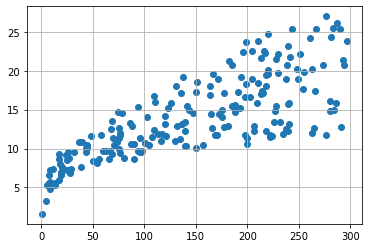

In [12]:
plt.scatter(x, y)
plt.grid()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
model = LinearRegression()

In [16]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.coef_, model.intercept_

(array([[0.04753664]]), array([7.03259355]))

In [19]:
model.score(x, y)

0.611875050850071

In [20]:
y_predict = model.predict(x)

In [21]:
mean_squared_error(y, y_predict)

10.512652915656757

In [22]:
mean_absolute_error(y, y_predict)

2.549806038927486

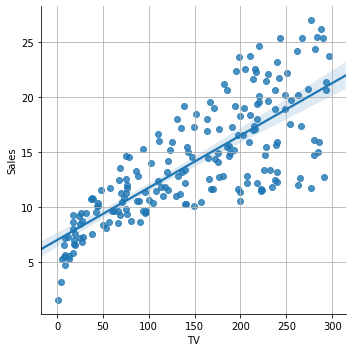

In [28]:
sb.lmplot(x='TV', y='Sales', data=df)
plt.grid()
plt.show()

In [30]:
x_input = [300, 500, 1000]
x_input = np.array(x_input).reshape(-1, 1)

In [31]:
y_predict = model.predict(x_input)
y_predict

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

In [32]:
df = pd.read_csv(uri, index_col=0, encoding='utf-8')
df.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

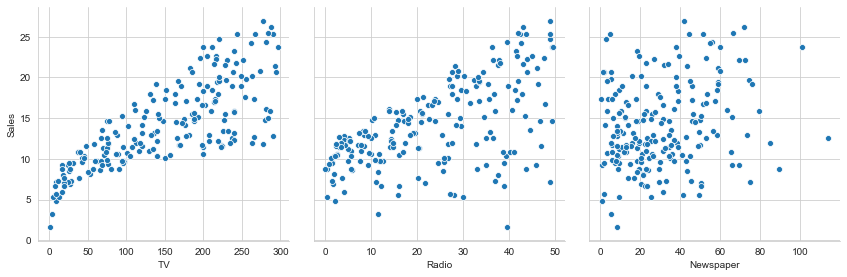

In [36]:
sb.set_style('whitegrid')
sb.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)

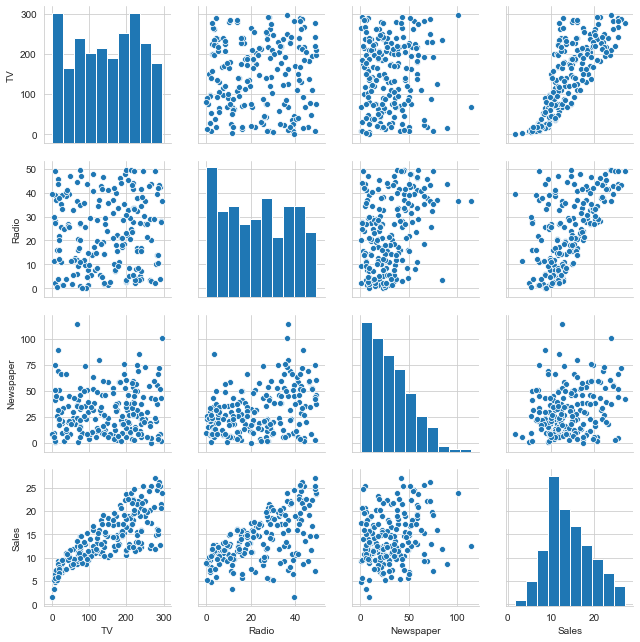

In [37]:
g = sb.pairplot(df)
g.fig.set_size_inches(9, 9)

In [38]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df['Sales']

In [39]:
model = LinearRegression()

In [43]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
model.intercept_

2.9388893694594085

In [46]:
model.score(X, y)

0.8972106381789521

In [47]:
x_input = [[300, 0, 0], [0, 300, 0], [0, 0, 300], [100, 200, 200], [100, 200, 0]]

In [48]:
model.predict(x_input)

array([16.66828301, 59.49789444,  2.62764146, 45.01385869, 45.2213573 ])

In [49]:
uri = '~/Desktop/my_machine_learning/csv/gdp4c.csv'

In [50]:
df = pd.read_csv(uri, index_col=0)
df.head()

SGP           THA           USA  VNM
1960  704462302.4  2.760747e+09  5.433000e+11  NaN
1961  764308114.5  3.034044e+09  5.633000e+11  NaN
1962  825885273.7  3.308913e+09  6.051000e+11  NaN
1963  917222004.4  3.540403e+09  6.386000e+11  NaN
1964  893734483.2  3.889130e+09  6.858000e+11  NaN

In [51]:
df.shape

(58, 4)

In [52]:
df.describe()

SGP           THA           USA           VNM
count  5.800000e+01  5.800000e+01  5.800000e+01  3.300000e+01
mean   8.043585e+10  1.227440e+11  6.991516e+12  6.878553e+10
std    1.007247e+11  1.353708e+11  5.857794e+12  6.664636e+10
min    7.044623e+08  2.760747e+09  5.433000e+11  6.293305e+09
25%    5.320927e+09  1.399794e+10  1.583852e+12  2.465747e+10
50%    2.788040e+10  6.695904e+10  5.455160e+12  3.506411e+10
75%    9.937334e+10  1.719910e+11  1.137740e+13  1.060150e+11
max    3.239070e+11  4.552210e+11  1.939060e+13  2.238640e+11

In [53]:
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

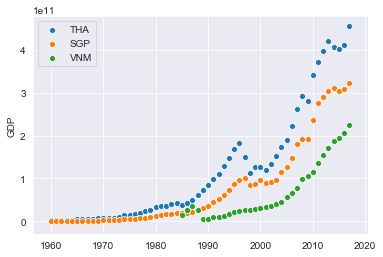

In [56]:
sb.set_style('darkgrid')
sb.scatterplot(df.index, df['THA'], label='THA')
sb.scatterplot(df.index, df['SGP'], label='SGP')
sb.scatterplot(df.index, df['VNM'], label='VNM')
plt.ylabel('GDP')
plt.show()

In [57]:
x = df.index.values.reshape(-1, 1)
y = df['THA']

In [58]:
model = LinearRegression()

In [59]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

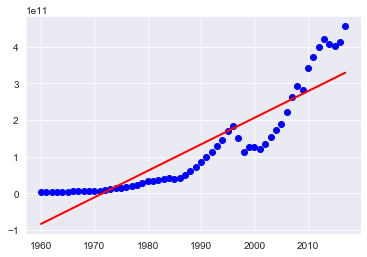

In [60]:
y_predict = model.predict(x)
plt.scatter(x, y, color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [63]:
print('R2 = {:.5f}'.format(model.score(x, y)))
print('MSE = {:.4e}'.format(mean_squared_error(y, y_predict)))
print('RMSE = {:.4e}'.format(np.sqrt(mean_squared_error(y, y_predict))))

R2 = 0.81300
MSE = 3.3677e+21
RMSE = 5.8032e+10


In [65]:
y_predict = model.predict([[2020]])
print('{:.6e}'.format(y_predict[0]))

3.504274e+11


In [66]:
# Workshop 7

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

In [84]:
model = LinearRegression()

In [91]:
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_predict = model.predict(x_poly)

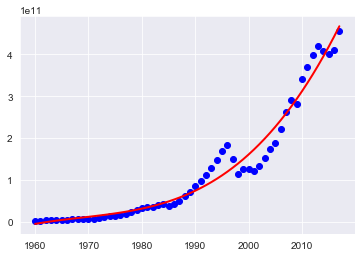

In [87]:
plt.scatter(x, y, color='b')
plt.plot(x, y_predict, linewidth='2', color='r')
plt.show()

In [88]:
print('R2 = {:.5f}'.format(model.score(x_poly, y)))

R2 = 0.96689


In [93]:
x_input = [2015, 2018, 2020]
x_input = np.array(x_input).reshape(-1, 1)
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
for val in y_poly_pred:
    print('{:.4e}'.format(val))

4.0035e+11
4.5629e+11
4.9563e+11


In [94]:
df.tail()

SGP           THA           USA           VNM
2013  3.044540e+11  4.203330e+11  1.669150e+13  1.712220e+11
2014  3.115390e+11  4.073390e+11  1.742760e+13  1.862050e+11
2015  3.040980e+11  4.013990e+11  1.812070e+13  1.932410e+11
2016  3.097640e+11  4.117550e+11  1.862450e+13  2.052760e+11
2017  3.239070e+11  4.552210e+11  1.939060e+13  2.238640e+11

In [95]:
x = df.index.values.reshape(-1, 1)
y = df['SGP'].values.reshape(-1, 1)

In [99]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_predict = model.predict(x)

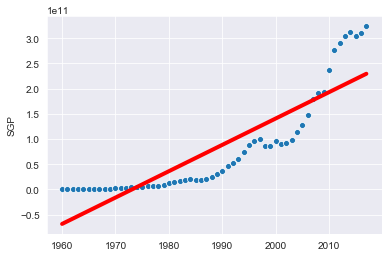

In [102]:
sb.set_style('darkgrid')
sb.scatterplot(df.index, df['SGP'])
plt.plot(df.index, y_predict, linewidth=4, color='r')
plt.show()

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly_featuers2 = PolynomialFeatures(degree=3)

In [136]:
x_poly = poly_featuers2.fit_transform(x)

In [137]:
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_predict = model.predict(x_poly)

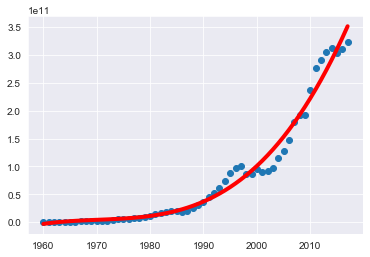

In [139]:
plt.scatter(x, y)
plt.plot(x, y_predict, linewidth=4, color='r')
plt.show()

In [147]:
x_input = [2015, 2018, 2020]
x_input = np.array(x_input).reshape(-1, 1)

In [149]:
y_poly_pred = model.predict(poly_featuers2.fit_transform(x_input))

for val in y_poly_pred:
    print('{}'.format(val))

[3.10231183e+11]
[3.73322597e+11]
[4.19952636e+11]
